# **Case Indonesian Sentiment Twitter Dataset**

Dataset:

*   Dataset Labeled - [Download](https://drive.google.com/file/d/1GHFVtBnCGLzKVYT1lxFY2XNVV59Bqn3Q/view?usp=sharing)
*   Dataset Unlabeled - [Download](https://drive.google.com/file/d/1n_Dy8cGCPJdQi_3kr6lD8x8r5llf0Aag/view?usp=sharing)



### Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install Sastrawi dan NLTK

In [ ]:
pip install Sastrawi

     |████████████████████████████████| 209 kB 5.3 MB/s 


In [ ]:
import nltk


nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Dataset

In [ ]:
import pandas as pd


data_labeled = pd.read_csv('/content/drive/MyDrive/Kerja/Data Analyst - PT Codemi/Indonesian Sentiment Twitter Dataset Labeled.csv', sep="\t")


data_unlabeled = pd.read_csv('/content/drive/MyDrive/Kerja/Data Analyst - PT Codemi/Indonesian Sentiment Tweet Dataset Unlabeled.csv', header=None)
data_unlabeled.rename(columns={0:'Tweet'}, inplace=True)


pd.set_option('display.max_colwidth', None)

Data Labeled

In [ ]:
print("Sample Data Labeled")
data_labeled.head()

Sample Data Labeled


,sentimen,Tweet
0,-1,lagu bosan apa yang aku save ni huhuhuhuhuhuhuhuhuhuuuuuuuuuuuuuu
1,-1,kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati
2,1,doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p
3,1,makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu
4,-1,aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang


In [ ]:
print("Shape Data Labeled")
data_labeled.shape

Shape Data Labeled


(10806, 2)

Data Unlabeled

In [ ]:
print("Sample Data Unlabeled")
data_unlabeled.head()

Sample Data Unlabeled


,Tweet
0,lagu bosan apa yang aku save ni huhuhuhuhuhuhuhuhuhuuuuuuuuuuuuuu
1,kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati
2,Doa rezeki tak putus Inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p
3,Makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu
4,Aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu Aku geli bodoh nak pegang


In [ ]:
print("Sample Data Unlabeled")
data_unlabeled.shape

Sample Data Unlabeled


(453390, 1)

## Preprocessing Unlabeled 

### Prepare Data

Memindah data pada dataframe ke array

In [ ]:
from pandas import DataFrame


dataraw_unlabeled = []
dataclean_unlabeled = []
i = 0


jml_data = data_unlabeled.shape
jml_data = jml_data[0]
print("jumlah data pada dataframe : ",jml_data)


while(i<jml_data):
  dataraw_unlabeled.append(data_unlabeled['Tweet'].loc[i])
  i = i+1


print("jumlah data pada array : ",len(dataraw_unlabeled))

jumlah data pada dataframe :  453390
jumlah data pada array :  453390


### Case Folding

In [ ]:
import re
import string


dataclean_unlabeledeled = []


for d in dataraw_unlabeled:
#CASE FOLDING
  # Remove Unicode
  document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
  # Remove Mentions
  document_test = re.sub(r'@\w+', '', document_test)
  # Remove punctuations
  document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
  # Lowercase the numbers
  document_test = re.sub(r'[0-9]', '', document_test)
  # Remove the doubled space
  document_test = re.sub(r'\s{2,}', ' ', document_test)

  # Lowercase the document
  document_test = document_test.lower()
  tmp = document_test
  dataclean_unlabeled.append(tmp)

In [ ]:
print("Jumlah data setelah Case Folding : ",len(dataclean_unlabeled))
print(dataclean_unlabeled[0])

Jumlah data setelah Case Folding :  453390
lagu bosan apa yang aku save ni huhuhuhuhuhuhuhuhuhuuuuuuuuuuuuuu


### Tokenizing

In [ ]:
datatoken = []


for i in range(len(dataclean_unlabeled)):
  tmp = nltk.tokenize.word_tokenize(dataclean_unlabeled[i])
  datatoken.append(tmp)


print("Banyaknya data setelah tokenizing = ",len(datatoken))

Banyaknya data setelah tokenizing =  453390


### Filtering (Stopword Removal)

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords



listStopword =  set(stopwords.words('indonesian'))
tmp = []
datafilter = []


for i in datatoken:
  for j in i:
    if j not in listStopword:
      tmp.append(j)
  datafilter.append(tmp)
  tmp = []
  


print("Banyaknya data setelah filtering = ",len(datafilter))

Banyaknya data setelah filtering =  453390


### Stemming

Proses stemming ini perlu untuk dilakukan, namun saya  menggunakan google colabs selalu crash karena melebihi batas penyimpanan / ram yang tersedia di google colabs, sedangkan laptop saya tidak memadai untuk ini. Sehingga saya memilih untuk menggunakan sample data. Pada awalnya saya memilih untuk meninggalkan langkah ini namun tetap saja pada tahap perubahan nested list hasil tokenizing menjadi list berisi string itu selalu ram google colabs habis. Sehingga saya memutuskan menggunakan sample 5rb data saja.

In [ ]:
sample_unlabeled = []
i = 0

while(i < 45000):
  sample_unlabeled.append(datafilter[i])
  i = i + 1

print(sample_unlabeled)

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
z=0

# coba = [['ini','data','percobaan'],['bagaimana','hasilnya'],['tidak','tahu','sepertinya','benar'],['semoga','ini','sudah','benar'],['aku','harapkan','juga','begitu']]
datastem = []
tmp = []


# for i in datafilter:
for i in sample_unlabeled:
  for j in i:
    tmp.append(stemmer.stem(j))
  datastem.append(tmp);
  tmp = []


print("Banyaknya data setelah filtering = ",len(datastem))

Banyaknya data setelah filtering =  45000


### Hasil Akhir Preprocessing

In [ ]:
def convert_list_to_string(nama_list, seperator=' '):
    """ Convert list to string, by joining all item in list with given separator.
        Returns the concatenated string """
    return seperator.join(nama_list)


finaldata_unlabeled = []


for i in datastem:
  finaldata_unlabeled.append(convert_list_to_string(i))

print("Banyaknya data setelah filtering = ",len(finaldata_unlabeled))

Banyaknya data setelah filtering =  45000


In [ ]:
print(finaldata_unlabeled[0])
print(len(finaldata_unlabeled))

lagu bosan save ni huhuhuhuhuhuhuhuhuhuuuuuuuuuuuuuu
45000


### Export Data Clean - Unlabeled

In [ ]:
df_final_unlabeled = DataFrame(columns=['Tweet'])
df_final_unlabeled['Tweet'] = finaldata_unlabeled

In [ ]:
df_final_unlabeled.head()

,Tweet
0,lagu bosan save ni huhuhuhuhuhuhuhuhuhuuuuuuuuuuuuuu
1,lanjut diam kau erti sama libat hati
2,doa rezeki putus inna haa zaa larizquna maa lahu min na fadesungguhnya beri p
3,makasih loh ntar hasil sisa
4,faham jenis orang malaysia ret nak sangkut hose tu geli bodoh nak pegang


In [ ]:
df_final_unlabeled.shape

(45000, 1)

In [ ]:
%cd /content/drive/MyDrive/Kerja/Data Analyst - PT Codemi/

/content/drive/MyDrive/Kerja/Data Analyst - PT Codemi


In [ ]:
df_final_unlabeled.to_csv(r'Indonesian Sentiment Tweet Clean Dataset Unlabeled.csv',index=False)

## Preprocessing Labeled 

### Prepare Data

Memindah data pada dataframe ke array

In [ ]:
from pandas import DataFrame


dataraw_labeled = []
sentiment_labeled = []
dataclean_labeled = []
i = 0


jml_data = data_labeled.shape
jml_data = jml_data[0]
print("jumlah data pada dataframe : ",jml_data)


while(i<jml_data):
  dataraw_labeled.append(data_labeled['Tweet'].loc[i])
  sentiment_labeled.append(data_labeled['sentimen'].loc[i])
  i = i+1


print("jumlah data pada array tweet: ", len(dataraw_labeled))
print("jumlah data pada array sentiment: ", len(sentiment_labeled))

jumlah data pada dataframe :  10806
jumlah data pada array tweet:  10806
jumlah data pada array sentiment:  10806


### Case Folding

In [ ]:
import re
import string


dataclean_labeledeled = []


for d in dataraw_labeled:
#CASE FOLDING
  # Remove Unicode
  document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
  # Remove Mentions
  document_test = re.sub(r'@\w+', '', document_test)
  # Remove punctuations
  document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
  # Lowercase the numbers
  document_test = re.sub(r'[0-9]', '', document_test)
  # Remove the doubled space
  document_test = re.sub(r'\s{2,}', ' ', document_test)

  # Lowercase the document
  document_test = document_test.lower()
  tmp = document_test
  dataclean_labeled.append(tmp)

In [ ]:
print("Jumlah data setelah Case Folding : ",len(dataclean_labeled))
print(dataclean_labeled[0])

Jumlah data setelah Case Folding :  10806
lagu bosan apa yang aku save ni huhuhuhuhuhuhuhuhuhuuuuuuuuuuuuuu


### Tokenizing

In [ ]:
datatoken = []


for i in range(len(dataclean_labeled)):
  tmp = nltk.tokenize.word_tokenize(dataclean_labeled[i])
  datatoken.append(tmp)


print("Banyaknya data setelah tokenizing = ",len(datatoken))

Banyaknya data setelah tokenizing =  10806


### Filtering (Stopword Removal)

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords



listStopword =  set(stopwords.words('indonesian'))
tmp = []
datafilter = []


for i in datatoken:
  for j in i:
    if j not in listStopword:
      tmp.append(j)
  datafilter.append(tmp)
  tmp = []
  


print("Banyaknya data setelah filtering = ",len(datafilter))

Banyaknya data setelah filtering =  10806


### Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
z=0

# coba = [['ini','data','percobaan'],['bagaimana','hasilnya'],['tidak','tahu','sepertinya','benar'],['semoga','ini','sudah','benar'],['aku','harapkan','juga','begitu']]
datastem = []
tmp = []


# for i in datafilter:
for i in datafilter:
  for j in i:
    tmp.append(stemmer.stem(j))
  datastem.append(tmp);
  tmp = []


print("Banyaknya data setelah filtering = ",len(datastem))

Banyaknya data setelah filtering =  10806


### Hasil Akhir Preprocessing

In [ ]:
def convert_list_to_string(nama_list, seperator=' '):
    """ Convert list to string, by joining all item in list with given separator.
        Returns the concatenated string """
    return seperator.join(nama_list)


finaldata_labeled = []


for i in datastem:
  finaldata_labeled.append(convert_list_to_string(i))

print("Banyaknya data setelah filtering = ",len(finaldata_labeled))

Banyaknya data setelah filtering =  10806


In [ ]:
print(finaldata_labeled[0])
print(len(finaldata_labeled))

lagu bosan save ni huhuhuhuhuhuhuhuhuhuuuuuuuuuuuuuu
10806


### Export Data Clean - Labeled

In [ ]:
df_final_labeled = DataFrame(columns=['Tweet', 'Sentiment'])
df_final_labeled['Tweet'] = finaldata_labeled
df_final_labeled['Sentiment'] = sentiment_labeled

In [ ]:
df_final_labeled.head()

,Tweet,Sentiment
0,lagu bosan save ni huhuhuhuhuhuhuhuhuhuuuuuuuuuuuuuu,-1
1,lanjut diam kau erti sama libat hati,-1
2,doa rezeki putus inna haa zaa larizquna maa lahu min na fadesungguhnya beri p,1
3,makasih loh ntar hasil sisa,1
4,faham jenis orang malaysia ret nak sangkut hose tu geli bodoh nak pegang,-1


In [ ]:
df_final_labeled.shape

(10806, 2)

In [ ]:
%cd /content/drive/MyDrive/Kerja/Data Analyst - PT Codemi/

/content/drive/MyDrive/Kerja/Data Analyst - PT Codemi


In [ ]:
df_final_labeled.to_csv(r'Indonesian Sentiment Tweet Clean Dataset Labeled.csv',index=False)

## Word Cloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
wordcloud2 = WordCloud(background_color="white", width=9000, height=6000, max_words=3000).generate(' '.join(finaldata_unlabeled))

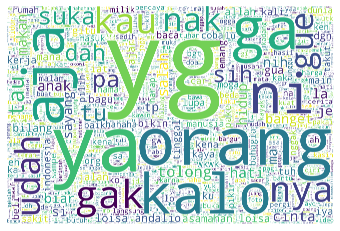

In [ ]:
plt.imshow(wordcloud2)
plt.axis("off")
plt.savefig("wordcloud_45k.svg")
plt.savefig("wordcloud_45k.png")
plt.show()